#Import Files

In [1]:
from google.colab import files
files.upload()

Saving tehranhouses.csv to tehranhouses.csv


{'tehranhouses.csv': b'Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)\r\n63,1,TRUE,TRUE,TRUE,Shahran,1850000000,61666.67\r\n60,1,TRUE,TRUE,TRUE,Shahran,1850000000,61666.67\r\n79,2,TRUE,TRUE,TRUE,Pardis,550000000,18333.33\r\n95,2,TRUE,TRUE,TRUE,Shahrake Qods,902500000,30083.33\r\n123,2,TRUE,TRUE,TRUE,Shahrake Gharb,7000000000,233333.33\r\n70,2,TRUE,TRUE,FALSE,North Program Organization,2050000000,68333.33\r\n87,2,TRUE,TRUE,TRUE,Pardis,600000000,20000\r\n59,1,TRUE,TRUE,TRUE,Shahran,2150000000,71666.67\r\n54,2,TRUE,TRUE,FALSE,Andisheh,493000000,16433.33\r\n71,1,TRUE,TRUE,TRUE,West Ferdows Boulevard,2370000000,79000\r\n68,2,TRUE,TRUE,TRUE,West Ferdows Boulevard,2450000000,81666.67\r\n64,1,TRUE,TRUE,TRUE,Narmak,2100000000,70000\r\n54,1,FALSE,TRUE,TRUE,Narmak,1690000000,56333.33\r\n136,3,TRUE,TRUE,TRUE,Saadat Abad,11000000000,366666.67\r\n95,2,TRUE,TRUE,TRUE,Zafar,5000000000,166666.67\r\n63,1,FALSE,TRUE,FALSE,Islamshahr,570000000,19000\r\n155,3,TRUE,TRUE,TRUE,Narmak,6700000000

#import the libraries


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [3]:
df=pd.read_csv("tehranhouses.csv")
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3500000000,116666.67
3475,83,2,True,True,True,Niavaran,6800000000,226666.67
3476,75,2,False,False,False,Parand,365000000,12166.67
3477,105,2,True,True,True,Dorous,5600000000,186666.67


#EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   int64  
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(2)
memory usage: 146.2+ KB


In [5]:
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')


In [6]:
df.isnull().sum()

,0
Area,6
Room,0
Parking,0
Warehouse,0
Elevator,0
Address,23
Price,0
Price(USD),0


In [7]:
df.dropna(inplace=True)

In [8]:
df['Parking'].value_counts()

,count
Parking,
True,2924
False,526


In [9]:
pd.crosstab(df.Parking, df.Room)

Room,0,1,2,3,4,5
Parking,,,,,,
False,8,243,243,26,1,5
True,2,426,1695,704,69,28


In [10]:
df[['Address','Price(USD)','Area']].groupby('Address').agg(['mean']).sort_values(by=('Price(USD)','mean'),ascending=False)


,Price(USD),Area
,mean,mean
Address,,
Gandhi,2.333333e+06,500.000000
Lavasan,1.600000e+06,415.000000
Mahmoudieh,1.115556e+06,362.666667
Vanak,1.090000e+06,216.000000
Elahieh,8.928784e+05,217.235294
...,...,...
Hassan Abad,1.700000e+04,65.000000
Firoozkooh,1.566667e+04,77.000000


In [11]:
pip install ydata-profiling


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.0 MB/s eta 0:00:00


#EDA of Profiling

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Data Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 72.68it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#Visualization

<Figure size 800x500 with 0 Axes>

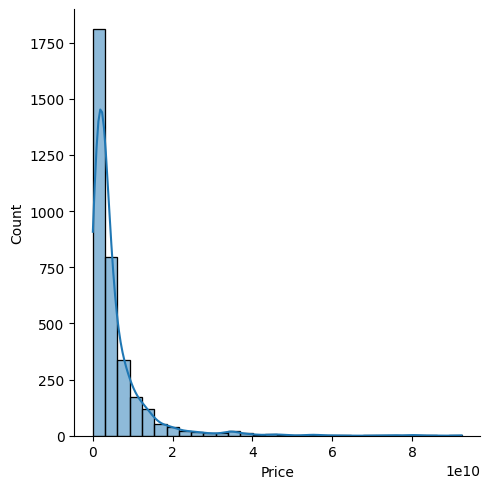

In [ ]:
plt.figure(figsize=(8,5))
sns.displot(df['Price'], bins=30, kde=True)


In [ ]:
df.dtypes

,0
Area,float64
Room,int64
Parking,bool
Warehouse,bool
Elevator,bool
Address,object
Price,int64
Price(USD),float64


<Axes: >

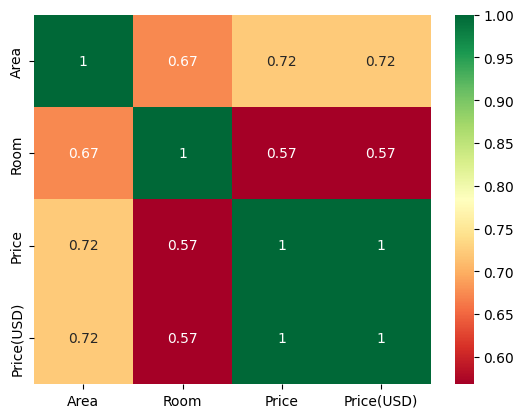

In [ ]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='RdYlGn')

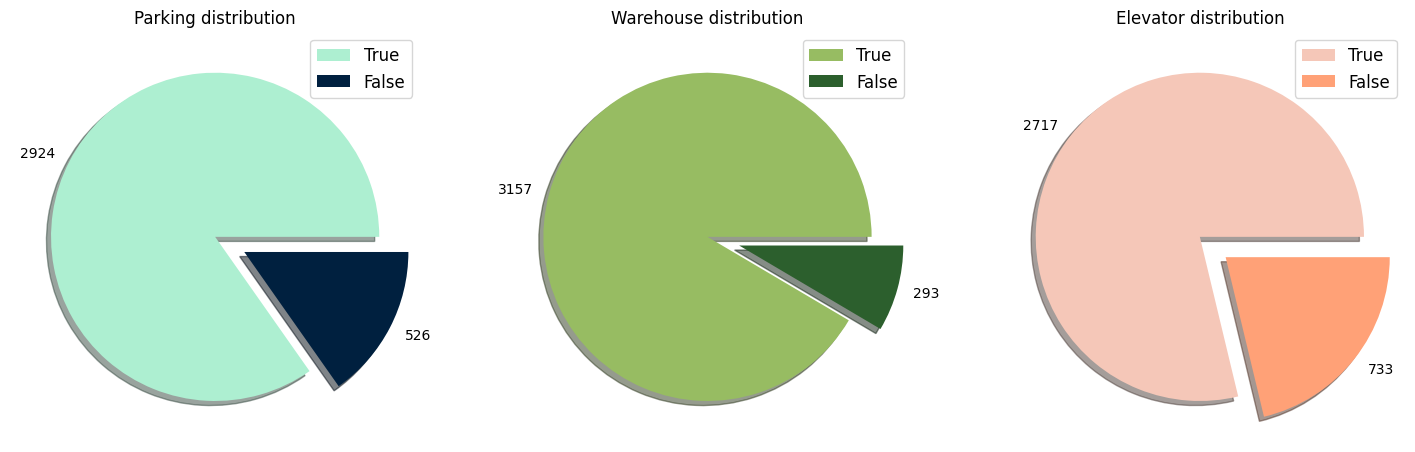

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))
colors = [['#ADEFD1FF', '#00203FFF'], ['#97BC62FF', '#2C5F2D'], ['#F5C7B8FF', '#FFA177FF']]
explode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']
for i in range(3):
        data = df[columns[i]].value_counts()
        ax[i].pie(data, labels=data.values, explode=explode, colors=colors[i], shadow=True)
        ax[i].legend(labels=data.index, fontsize='large')
        ax[i].set_title('{} distribution'.format(columns[i]))

In [18]:
df3 = df['Address'].value_counts().copy()
df3 = df3[:8]

Text(0.5, 1.0, 'Number of flats in location')

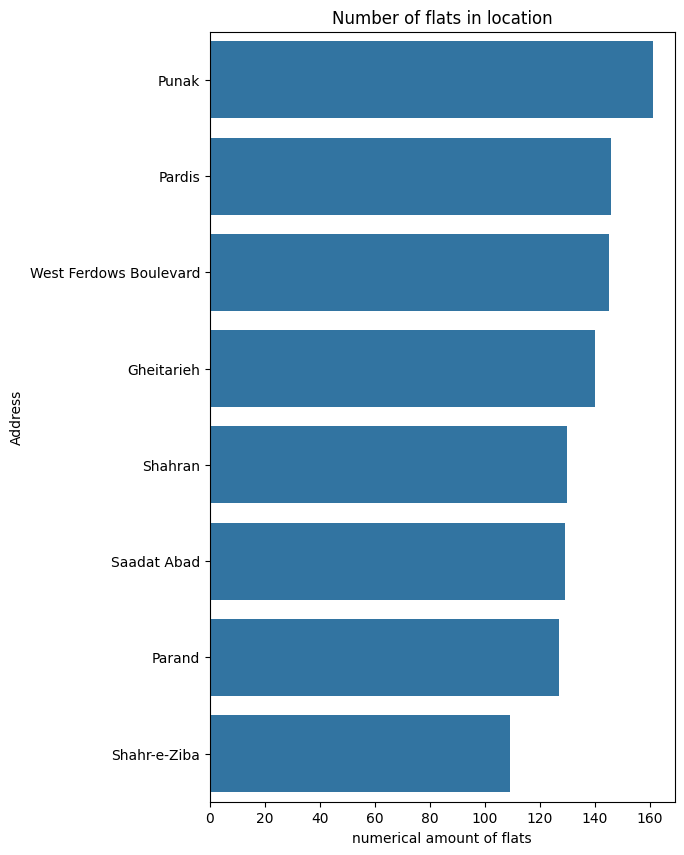

In [19]:
fig, ax = plt.subplots(figsize=(6,10))
sns.barplot(x=df3.values, y=df3.index, ax=ax)
plt.xlabel('numerical amount of flats')
plt.title('Number of flats in location')

In [20]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [21]:
df.sort_values('Price', ascending=True)[['Address']].head(20)

,Address
136,Qarchak
2770,Ozgol
731,Pardis
2721,Parand
2201,Andisheh
137,Pakdasht
2084,Pakdasht
2666,Shahedshahr
1343,Parand
2921,Islamshahr


#Preprocessing

In [22]:
df.isnull().sum()

,0
Area,0
Room,0
Parking,0
Warehouse,0
Elevator,0
Address,0
Price,0
Price(USD),0


In [23]:
df= df.drop(columns=['Price(USD)'])
boolean_features=['Parking','Warehouse','Elevator']
#for feature in boolean_features:
 # df[feature]=df[feature].map({'Yes':1,'No':0})
df[boolean_features]=df[boolean_features].astype('int64')

df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63.0,1,1,1,1,Shahran,1850000000
1,60.0,1,1,1,1,Shahran,1850000000
2,79.0,2,1,1,1,Pardis,550000000
3,95.0,2,1,1,1,Shahrake Qods,902500000
4,123.0,2,1,1,1,Shahrake Gharb,7000000000


In [ ]:
df.skew()

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(2,1,1)
sns.boxplot(x=df['Area'])

plt.subplot(2,1,2)
sns.boxplot(x=df['Price'])


In [25]:
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return lower, upper

lower_area, upper_area = lower_upper(df['Area'])
lower_price, upper_price = lower_upper(df['Price'])

print(f"Lower limit for area: {lower_area:0.2f}")
print(f"Upper limit for area: {upper_area:0.2f}")
print(f"Lower limit for price: {lower_price:,}")
print(f"Upper limit for price: {upper_price:,}")

Lower limit for area: -7.50
Upper limit for area: 196.50
Lower limit for price: -5,451,875,000.0
Upper limit for price: 12,871,125,000.0


In [26]:
area_outliers = np.where(df['Area'] > upper_area)
price_outliers = np.where(df['Price'] > upper_price)
# Return the unique, sorted array of values that are in either of the two input arrays.
total_outliers = np.union1d(area_outliers, price_outliers)

print(f"Number of area outliers: {len(df.iloc[area_outliers])}")
print(f"Number of price outliers: {len(df.iloc[price_outliers])}")
print(f"Number of outliers: {len(df.iloc[total_outliers])}")

Number of area outliers: 238
Number of price outliers: 309
Number of outliers: 361


In [27]:
Address_dummy=pd.get_dummies(df['Address'])
df_final=df.merge(Address_dummy, left_index=True, right_index=True)
df_final.drop(columns=['Address'], inplace=True)
df_final.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Absard,Abuzar,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63.0,1,1,1,1,1850000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,60.0,1,1,1,1,1850000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,79.0,2,1,1,1,550000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,95.0,2,1,1,1,902500000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,123.0,2,1,1,1,7000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
df_final

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Absard,Abuzar,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63.0,1,1,1,1,1850000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,60.0,1,1,1,1,1850000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,79.0,2,1,1,1,550000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,95.0,2,1,1,1,902500000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,123.0,2,1,1,1,7000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,86.0,2,1,1,1,3500000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3475,83.0,2,1,1,1,6800000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3476,75.0,2,0,0,0,365000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3477,105.0,2,1,1,1,5600000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
X=df_final. drop(columns=['Price'])
y=df_final['Price']
X_train, X_test,y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (2760, 197)
Shape of X_test: (690, 197)
Shape of y_train: (2760,)
Shape of y_test: (690,)


In [29]:
def parameter_finder (model, parameters):

    start = time.time()

    grid = GridSearchCV(model,
                        param_grid = parameters,
                        refit = True,
                        cv = KFold(shuffle = True, random_state = 1),
                        n_jobs = -1)
    grid_fit = grid.fit(X_train, y_train)
    y_train_pred = grid_fit.predict(X_train)
    y_pred = grid_fit.predict(X_test)

    train_score =grid_fit.score(X_train, y_train)
    test_score = grid_fit.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

    model_name = str(model).split('(')[0]

    end = time.time()

    print(f"The best parameters for {model_name} model is: {grid_fit.best_params_}")
    print("--" * 10)
    print(f"(R2 score) in the training set is {train_score:0.2%} for {model_name} model.")
    print(f"(R2 score) in the testing set is {test_score:0.2%} for {model_name} model.")
    print(f"RMSE is {RMSE:,} for {model_name} model.")
    print("--" * 10)
    print(f"Runtime of the program is: {end - start:0.2f}")


    return train_score, test_score, RMSE

In [39]:
lr = LinearRegression(n_jobs = -1)

lr_train_score, lr_test_score, lr_RMSE = parameter_finder(lr, {})

The best parameters for LinearRegression model is: {}
--------------------
(R2 score) in the training set is 73.89% for LinearRegression model.
(R2 score) in the testing set is 75.59% for LinearRegression model.
RMSE is 4,136,170,584.2511873 for LinearRegression model.
--------------------
Runtime of the program is: 4.53


In [40]:
ridge= Ridge(random_state=1)
param_ridge={"alpha":[0.001, 0.01, 0.1, 1, 10]}

ridge_train_score, ridge_test_score, ridge_RMSE = parameter_finder(ridge, param_ridge)

The best parameters for Ridge model is: {'alpha': 1}
--------------------
(R2 score) in the training set is 73.09% for Ridge model.
(R2 score) in the testing set is 75.94% for Ridge model.
RMSE is 4,106,340,011.9641323 for Ridge model.
--------------------
Runtime of the program is: 3.22


In [41]:
lasso=Lasso(random_state=1)
param_lasso={"alpha":[0.001, 0.01, 0.1, 1, 10]}

lasso_train_score, lasso_test_score, lasso_RMSE = parameter_finder(lasso, param_lasso)

The best parameters for Lasso model is: {'alpha': 10}
--------------------
(R2 score) in the training set is 73.89% for Lasso model.
(R2 score) in the testing set is 75.55% for Lasso model.
RMSE is 4,140,043,072.024883 for Lasso model.
--------------------
Runtime of the program is: 16.10


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.676e+22, tolerance: 1.794e+19
  model = cd_fast.enet_coordinate_descent(


In [42]:
eln=ElasticNet(random_state=1)
param_eln={"alpha":[0.001, 0.01, 0.1, 1, 10]}

eln_train_score, eln_test_score, eln_RMSE = parameter_finder(eln, param_eln)

The best parameters for ElasticNet model is: {'alpha': 0.001}
--------------------
(R2 score) in the training set is 72.73% for ElasticNet model.
(R2 score) in the testing set is 75.96% for ElasticNet model.
RMSE is 4,104,667,855.563794 for ElasticNet model.
--------------------
Runtime of the program is: 1.61


In [44]:
dtr= DecisionTreeRegressor(random_state=1)
param_dtr={"max_depth":[1,2,3,4,5,6,7,8,9,10]}

dtr_train_score, dtr_test_score, dtr_RMSE = parameter_finder(dtr, param_dtr)

The best parameters for DecisionTreeRegressor model is: {'max_depth': 6}
--------------------
(R2 score) in the training set is 84.22% for DecisionTreeRegressor model.
(R2 score) in the testing set is 72.42% for DecisionTreeRegressor model.
RMSE is 4,396,804,302.734794 for DecisionTreeRegressor model.
--------------------
Runtime of the program is: 3.08


In [52]:
rfr= RandomForestRegressor(random_state=1)
param_RandoMForestRegressor={"max_depth":[1,2,3,4,5,6,7,8,9,10]}
rfr_train_score, rfr_test_score, rfr_RMSE = parameter_finder(rfr, param_RandoMForestRegressor)

The best parameters for RandomForestRegressor model is: {'max_depth': 10}
--------------------
(R2 score) in the training set is 90.85% for RandomForestRegressor model.
(R2 score) in the testing set is 75.36% for RandomForestRegressor model.
RMSE is 4,155,711,208.8579173 for RandomForestRegressor model.
--------------------
Runtime of the program is: 32.23


In [48]:
knr = KNeighborsRegressor(n_jobs = -1)
param_knr = {'n_neighbors': [5, 10, 15, 20],
            'weights': ['uniform', 'distance']}

knr_train_score, knr_test_score, knr_RMSE = parameter_finder(knr, param_knr)

The best parameters for KNeighborsRegressor model is: {'n_neighbors': 20, 'weights': 'uniform'}
--------------------
(R2 score) in the training set is 63.22% for KNeighborsRegressor model.
(R2 score) in the testing set is 67.21% for KNeighborsRegressor model.
RMSE is 4,794,095,164.588371 for KNeighborsRegressor model.
--------------------
Runtime of the program is: 6.35


In [49]:
xgboost=XGBRegressor(random_state=-1)
param_xgboost = {'n_estimators': [100,300],
             'learning_rate': [0.1,0.05],
             'subsample': [0.75],
             'colsample_bytree': [1],
             'max_depth': [3,4,5],
             'gamma': [0]}

xgboost_train_score, xgboost_test_score, xgboost_RMSE = parameter_finder(xgboost, param_xgboost)


The best parameters for XGBRegressor model is: {'max_depth': 4}
--------------------
(R2 score) in the training set is 95.84% for XGBRegressor model.
(R2 score) in the testing set is 73.00% for XGBRegressor model.
RMSE is 4,350,214,905.702038 for XGBRegressor model.
--------------------
Runtime of the program is: 34.24


In [53]:
models_score = pd.DataFrame({'Training score': [lr_train_score, ridge_train_score, lasso_train_score, eln_train_score, dtr_train_score, rfr_train_score, knr_train_score,xgboost_train_score],
                             'Testing score': [lr_test_score, ridge_test_score, lasso_test_score, eln_test_score, dtr_test_score, rfr_test_score, knr_test_score,xgboost_test_score],
                             'RMSE': [lr_RMSE, ridge_RMSE, lasso_RMSE, eln_RMSE, dtr_RMSE, rfr_RMSE, knr_RMSE,xgboost_RMSE]},
                             index = ['LinearRegression', 'Ridge', 'Lasso','ElasticNet', 'DecisionTreeRegressor', 'RandomForestRegressor', 'KNeighborsRegressor','XGBoostRegressor'])
models_score

,Training score,Testing score,RMSE
LinearRegression,0.738851,0.755923,4.136171e+09
Ridge,0.730862,0.759431,4.106340e+09
Lasso,0.738851,0.755466,4.140043e+09
ElasticNet,0.727349,0.759627,4.104668e+09
DecisionTreeRegressor,0.842152,0.724194,4.396804e+09
RandomForestRegressor,0.908467,0.753611,4.155711e+09
KNeighborsRegressor,0.632209,0.672099,4.794095e+09
XGBoostRegressor,0.958401,0.730008,4.350215e+09


/tmp/ipython-input-1629708484.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=list(models_score.index), y=models_score['RMSE']/1000000000, alpha=0.7, palette='Greens_r')


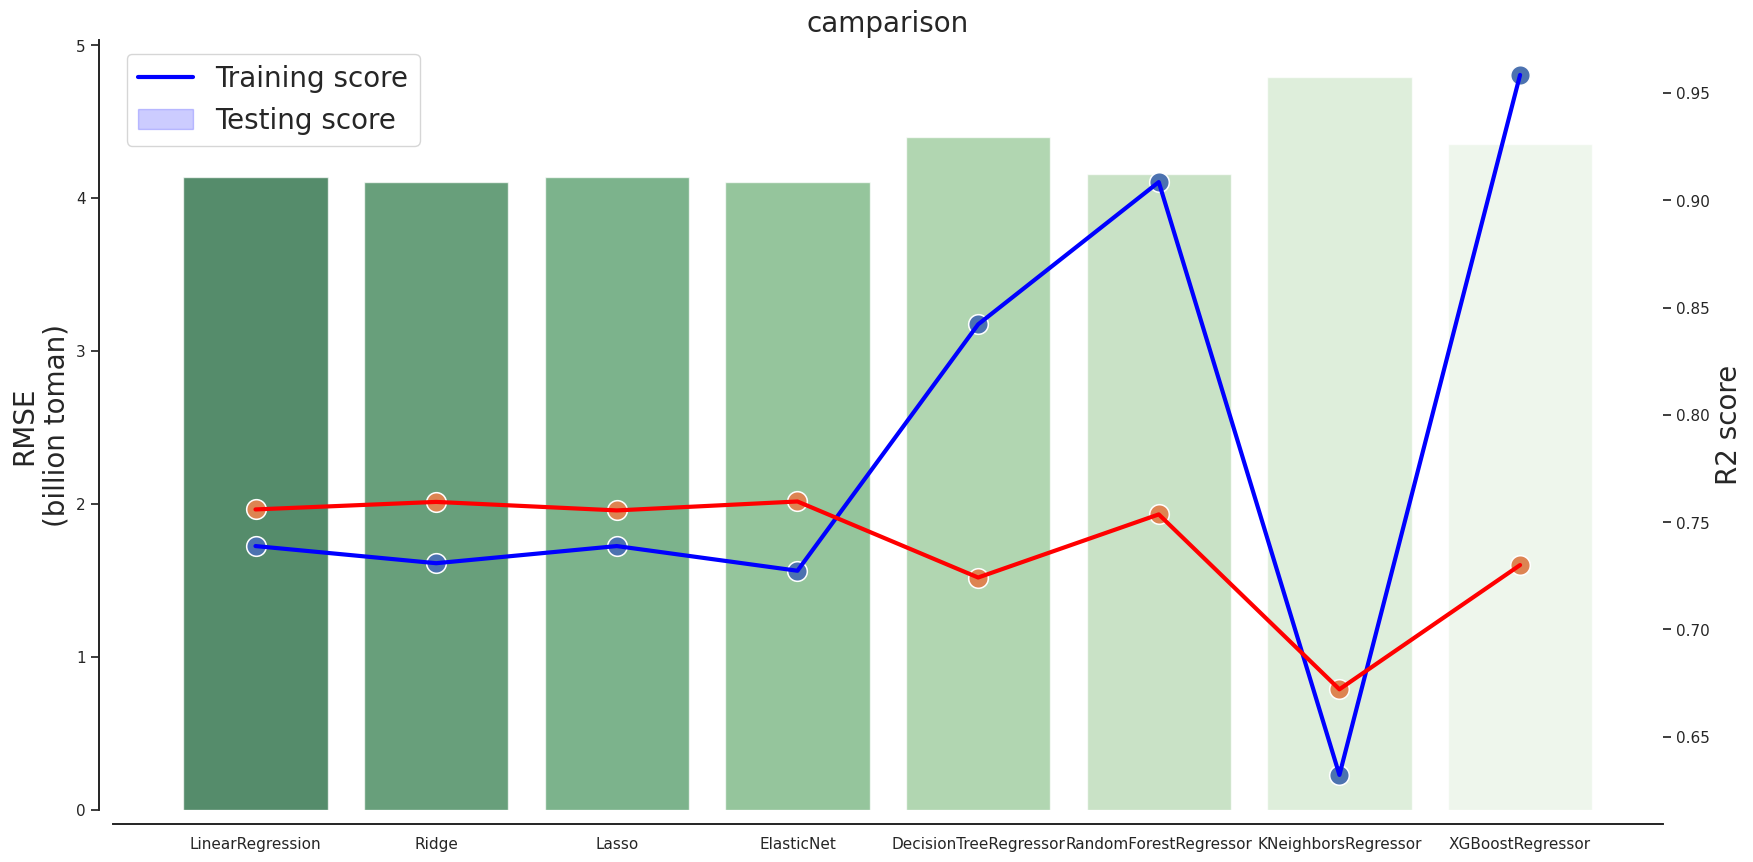

In [65]:
fig, ax= plt.subplots(figsize=(20,10))

sns.set(style='white')

ax.set_title("camparison", fontsize=20)
ax=sns.barplot(x=list(models_score.index), y=models_score['RMSE']/1000000000, alpha=0.7, palette='Greens_r')
ax.set_ylabel("RMSE\n(billion toman)", fontsize=20)
sec_ax=ax.twinx()

sec_ax=sns.lineplot(x=list(models_score.index),y=models_score['Training score'], linewidth=3 , color='blue')
sex_ax= sns.scatterplot(x=list(models_score.index), y=models_score['Training score'], s=200)

sex_ax= sns.lineplot(x=list(models_score.index), y=models_score['Testing score'], linewidth=3 , color='red')
sex_ax= sns.scatterplot(x=list(models_score.index), y=models_score['Testing score'], s=200)

sec_ax.set_ylabel("R2 score", fontsize=20)

sex_ax.legend(labels= ['Training score', 'Testing score'], fontsize=20)
sns.despine(offset=10)
plt.show()
